## png格式转换

In [3]:
import os
from PIL import Image

def convert_to_png(input_path, output_path):
    try:
        # 检查文件是否存在
        if not os.path.exists(input_path):
            print(f"File not found: {input_path}")
            return False
            
        img = Image.open(input_path)
        img.save(output_path, 'PNG')
        return True
    except Exception as e:
        print(f"Error converting {input_path}: {e}")
        return False

def process_directory(root_dir, output_dir):
    # 检查输入目录是否存在
    if not os.path.exists(root_dir):
        print(f"Input directory not found: {root_dir}")
        return
        
    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)
    
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(('.webp', '.jpeg', '.gif', '.jpg', '.svg')):
                input_path = os.path.join(root, file)
                # 保持原始目录结构
                relative_path = os.path.relpath(root, root_dir)
                output_subdir = os.path.join(output_dir, relative_path)
                os.makedirs(output_subdir, exist_ok=True)
                
                output_path = os.path.join(output_subdir, os.path.splitext(file)[0] + '.png')
                print(f"Processing: {input_path} -> {output_path}")
                if convert_to_png(input_path, output_path):
                    print(f"Successfully converted {input_path} to {output_path}")

if __name__ == "__main__":
    dataset_path = os.path.join('nba_dataset')
    output_path = os.path.join('nba_dataset_png')
    print(f"Starting conversion from {dataset_path} to {output_path}")
    process_directory(dataset_path, output_path)
    print("Conversion completed")

Starting conversion from nba_dataset to nba_dataset_png
Processing: nba_dataset\Allen_Iverson\10004.webp -> nba_dataset_png\Allen_Iverson\10004.png
Successfully converted nba_dataset\Allen_Iverson\10004.webp to nba_dataset_png\Allen_Iverson\10004.png
Processing: nba_dataset\Allen_Iverson\10005.webp -> nba_dataset_png\Allen_Iverson\10005.png
Successfully converted nba_dataset\Allen_Iverson\10005.webp to nba_dataset_png\Allen_Iverson\10005.png
Processing: nba_dataset\Allen_Iverson\10006.webp -> nba_dataset_png\Allen_Iverson\10006.png
Successfully converted nba_dataset\Allen_Iverson\10006.webp to nba_dataset_png\Allen_Iverson\10006.png
Processing: nba_dataset\Allen_Iverson\10007.webp -> nba_dataset_png\Allen_Iverson\10007.png
Successfully converted nba_dataset\Allen_Iverson\10007.webp to nba_dataset_png\Allen_Iverson\10007.png
Processing: nba_dataset\Allen_Iverson\10008.webp -> nba_dataset_png\Allen_Iverson\10008.png
Successfully converted nba_dataset\Allen_Iverson\10008.webp to nba_datas

In [5]:
import os
import hashlib
from collections import defaultdict

def get_file_hash(filepath):
    """计算文件的MD5哈希值"""
    hash_md5 = hashlib.md5()
    with open(filepath, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def find_duplicate_images_in_subdirs(directory):
    """查找每个子文件夹中的重复图片"""
    all_duplicates = {}
    
    # 遍历每个球员子文件夹
    for player_dir in os.listdir(directory):
        player_path = os.path.join(directory, player_dir)
        if os.path.isdir(player_path):
            hash_dict = defaultdict(list)
            
            # 检查该球员文件夹内的图片
            for root, dirs, files in os.walk(player_path):
                for file in files:
                    if file.lower().endswith('.png'):
                        file_path = os.path.join(root, file)
                        file_hash = get_file_hash(file_path)
                        hash_dict[file_hash].append(file_path)
            
            # 记录该球员文件夹内的重复文件
            player_duplicates = {k: v for k, v in hash_dict.items() if len(v) > 1}
            if player_duplicates:
                all_duplicates[player_dir] = player_duplicates
    
    return all_duplicates

def save_duplicates_report(duplicates, report_file):
    """保存重复文件报告"""
    with open(report_file, 'w', encoding='utf-8') as f:
        for player, player_duplicates in duplicates.items():
            f.write(f"Player: {player}\n")
            for hash_value, files in player_duplicates.items():
                f.write(f"  Hash: {hash_value}\n")
                for file_path in files:
                    f.write(f"    - {file_path}\n")
                f.write("\n")
            f.write("\n")

if __name__ == "__main__":
    dataset_png_path = os.path.join('nba_dataset_png')
    report_path = os.path.join('duplicates_report_by_player.txt')
    
    print("开始按球员子文件夹查找重复图片...")
    duplicates = find_duplicate_images_in_subdirs(dataset_png_path)
    
    if duplicates:
        print(f"找到 {len(duplicates)} 个球员有重复图片")
        save_duplicates_report(duplicates, report_path)
        print(f"重复文件报告已保存到: {report_path}")
        
        # 在控制台输出部分结果
        print("\n部分重复文件组(按球员):")
        for i, (player, player_duplicates) in enumerate(duplicates.items()):
            if i >= 3:  # 只显示前3个球员
                break
            print(f"\nPlayer: {player}")
            for hash_value, files in player_duplicates.items():
                print(f"  Hash: {hash_value}")
                for file_path in files:
                    print(f"    - {file_path}")
    else:
        print("没有找到重复图片")

开始按球员子文件夹查找重复图片...
找到 3 个球员有重复图片
重复文件报告已保存到: duplicates_report_by_player.txt

部分重复文件组(按球员):

Player: Kobe Bryant
  Hash: 77d1f5a936756bd503c398131c71a195
    - nba_dataset_png\Kobe Bryant\Kobe_Bryant_316_114.png
    - nba_dataset_png\Kobe Bryant\Kobe_Bryant_351_123.png
  Hash: 14d1bbdba4afd263ef3aed04cc03d8d4
    - nba_dataset_png\Kobe Bryant\Kobe_Bryant_386_151.png
    - nba_dataset_png\Kobe Bryant\Kobe_Bryant_421_168.png
  Hash: d7d0eda4aea4927fb5577b96d332c134
    - nba_dataset_png\Kobe Bryant\Kobe_Bryant_421_157.png
    - nba_dataset_png\Kobe Bryant\Kobe_Bryant_456_172.png
  Hash: a7f5ac59738e805a1b33e39b07b0c579
    - nba_dataset_png\Kobe Bryant\Kobe_Bryant_421_158.png
    - nba_dataset_png\Kobe Bryant\Kobe_Bryant_456_173.png
    - nba_dataset_png\Kobe Bryant\Kobe_Bryant_491_181.png
    - nba_dataset_png\Kobe Bryant\Kobe_Bryant_526_184.png
    - nba_dataset_png\Kobe Bryant\Kobe_Bryant_561_187.png
  Hash: 6c33e73a565ab15568af778672a884c3
    - nba_dataset_png\Kobe Bryant\Kobe_Bryan

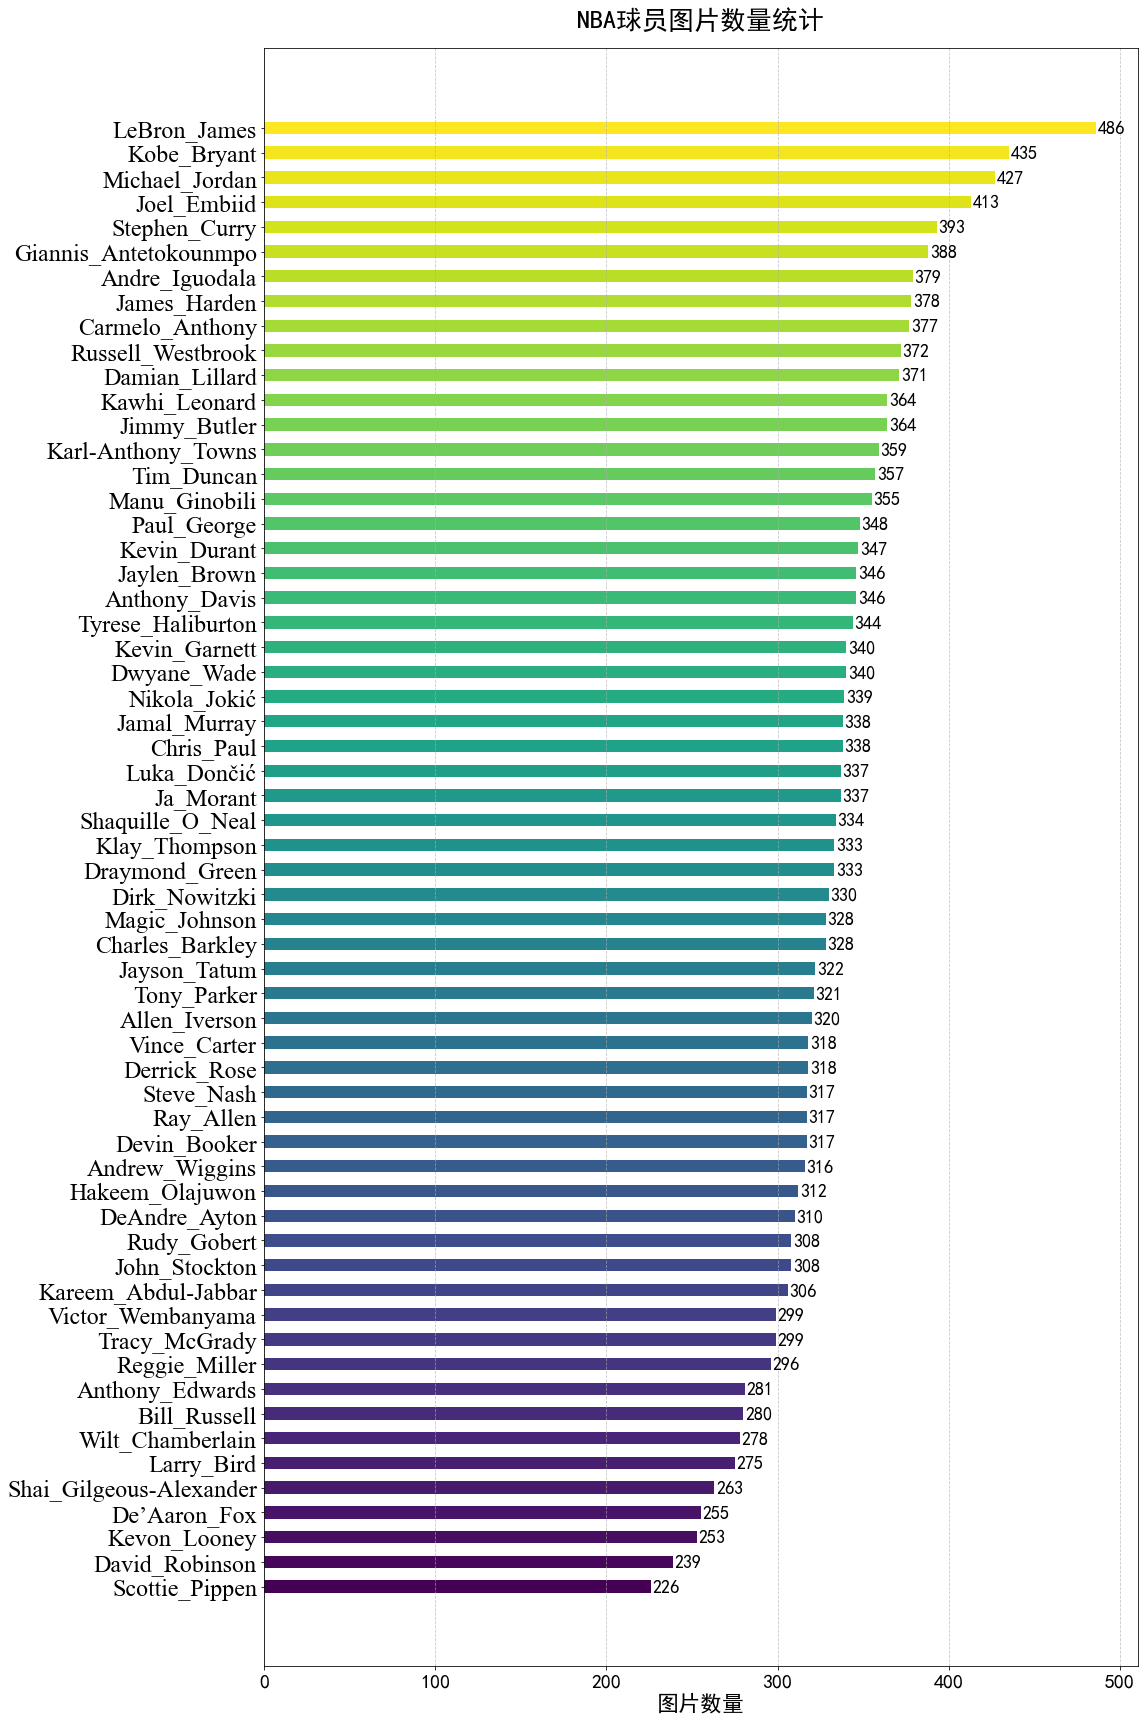

球员图片数量统计:
Scottie_Pippen: 226张
David_Robinson: 239张
Kevon_Looney: 253张
De’Aaron_Fox: 255张
Shai_Gilgeous-Alexander: 263张
Larry_Bird: 275张
Wilt_Chamberlain: 278张
Bill_Russell: 280张
Anthony_Edwards: 281张
Reggie_Miller: 296张
Tracy_McGrady: 299张
Victor_Wembanyama: 299张
Kareem_Abdul-Jabbar: 306张
John_Stockton: 308张
Rudy_Gobert: 308张
DeAndre_Ayton: 310张
Hakeem_Olajuwon: 312张
Andrew_Wiggins: 316张
Devin_Booker: 317张
Ray_Allen: 317张
Steve_Nash: 317张
Derrick_Rose: 318张
Vince_Carter: 318张
Allen_Iverson: 320张
Tony_Parker: 321张
Jayson_Tatum: 322张
Charles_Barkley: 328张
Magic_Johnson: 328张
Dirk_Nowitzki: 330张
Draymond_Green: 333张
Klay_Thompson: 333张
Shaquille_O_Neal: 334张
Ja_Morant: 337张
Luka_Dončić: 337张
Chris_Paul: 338张
Jamal_Murray: 338张
Nikola_Jokić: 339张
Dwyane_Wade: 340张
Kevin_Garnett: 340张
Tyrese_Haliburton: 344张
Anthony_Davis: 346张
Jaylen_Brown: 346张
Kevin_Durant: 347张
Paul_George: 348张
Manu_Ginobili: 355张
Tim_Duncan: 357张
Karl-Anthony_Towns: 359张
Jimmy_Butler: 364张
Kawhi_Leonard: 364张
Damian_

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Times New Roman']  # 中文用黑体，英文用Times New Roman
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置data文件夹路径
data_dir = 'h:/project/NBA/data'

# 获取所有球员子文件夹
player_folders = [f for f in os.listdir(data_dir) 
                 if os.path.isdir(os.path.join(data_dir, f))]

# 统计每个球员文件夹中的图片数量
player_counts = {}
for player in player_folders:
    player_path = os.path.join(data_dir, player)
    try:
        count = len([f for f in os.listdir(player_path) 
                    if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        player_counts[player] = count
    except:
        continue

# 按图片数量排序（从多到少）
sorted_players = sorted(player_counts.items(), key=lambda x: x[1], reverse=False)
players = [p[0] for p in sorted_players]
counts = [p[1] for p in sorted_players]

# 创建美观的横向柱状图
plt.figure(figsize=(16, 24))  # 增大图形高度以适应更大的字体

# 使用渐变色
colors = cm.viridis(np.linspace(0, 1, len(players)))

# 创建横向柱状图，增加条间距
bars = plt.barh(players, counts, color=colors, height=0.5)  # 调整height参数增大条间距

# 添加数据标签（增大字体）
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}',
             ha='left', va='center', fontsize=18)  # 增大数字字体

# 美化图表
plt.title('NBA球员图片数量统计', fontsize=26, pad=20)  # 增大标题字体
plt.xlabel('图片数量', fontsize=22)  # 增大坐标轴标签字体
plt.yticks(fontsize=24, fontfamily='Times New Roman') 
plt.xticks(fontsize=20)  # 增大x轴数字字体
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# 保存图表
plt.savefig('h:/project/NBA/pic/player_image_counts_horizontal_v2.png', dpi=300, bbox_inches='tight')
plt.show()

# 打印统计结果
print("球员图片数量统计:")
for player, count in sorted_players:
    print(f"{player}: {count}张")